<a href="https://colab.research.google.com/github/Devbrat-Singh/Image_Classification/blob/main/Using_PretrainedModel_Without_ImageAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive


'Colab Notebooks'   dogs_vs_cats.zip   MajorProject


In [ ]:
!unzip /content/drive/MyDrive/dogs_vs_cats.zip -d /content/dogs_vs_cats


Streaming output truncated to the last 5000 lines.
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4419.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.442.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4420.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4421.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4422.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4424.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4425.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4426.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4427.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4431.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4433.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog.4436.jpg  
  inflating: /content/dogs_vs_cats/dogs_vs_cats/train/dogs/dog

<h3>Import Libraries</h3>

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten

from keras.applications.vgg16 import VGG16

In [ ]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

<h4>We can clearly observe that last few layers are removed like Flatten Fully connected layers & output layers</h4>

<h3> because include_top=False</h3>

<h3>Now add layers according to your Need</h3>

In [ ]:
from tensorflow.keras.regularizers import l2
from keras.layers import Dropout

model=Sequential()

model.add(conv_base)
model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
conv_base.trainable=False # Freez training of VGG16 layers

<h4>Generator to deal with large dataSet</h4>

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/dogs_vs_cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/dogs_vs_cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


<h4>Now Normalize the image [0,1] range</h4>

In [ ]:
def process(image,label):
  image=tensorflow.cast(image/255.,tensorflow.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop=F=EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
  )

In [ ]:
history=model.fit(
    train_ds,
    epochs=15,
    validation_data=validation_ds,
    callbacks=[early_stop]
)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 95s 137ms/step - accuracy: 0.8330 - loss: 0.5909 - val_accuracy: 0.9024 - val_loss: 0.3237
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 139ms/step - accuracy: 0.8902 - loss: 0.3531 - val_accuracy: 0.8914 - val_loss: 0.3210
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 138ms/step - accuracy: 0.8899 - loss: 0.3345 - val_accuracy: 0.9020 - val_loss: 0.3125
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 139ms/step - accuracy: 0.8941 - loss: 0.3245 - val_accuracy: 0.9062 - val_loss: 0.2994
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 139ms/step - accuracy: 0.8906 - loss: 0.3372 - val_accuracy: 0.9116 - val_loss: 0.2839
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 139ms/step - accuracy: 0.8926 - loss: 0.3260 - val_accuracy: 0.9096 - val_loss: 0.2908
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 140ms/step - accuracy: 0.8919 - loss: 0.3271 - val_accuracy: 0.9092 - val_loss: 0.2891
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 138ms/step - accuracy: 0.8964 - loss: 

<h2>Before:Model show Overfitting</h2>

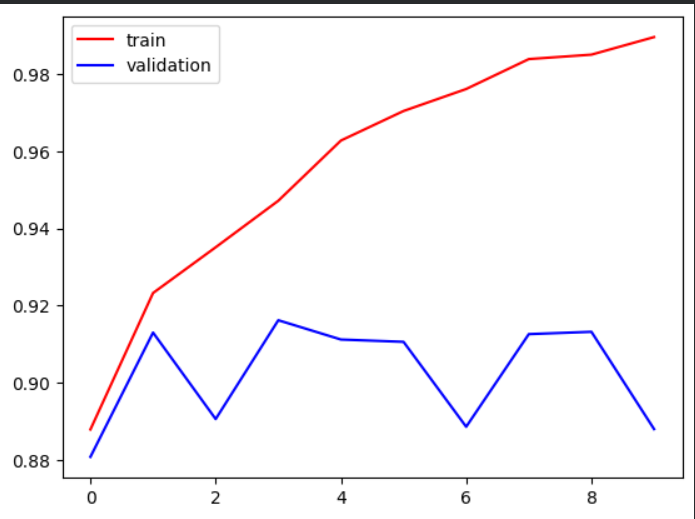

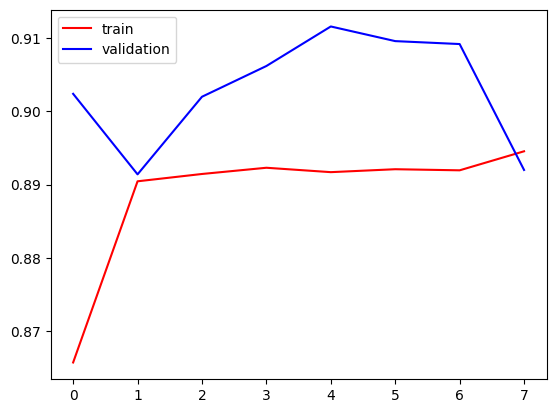

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

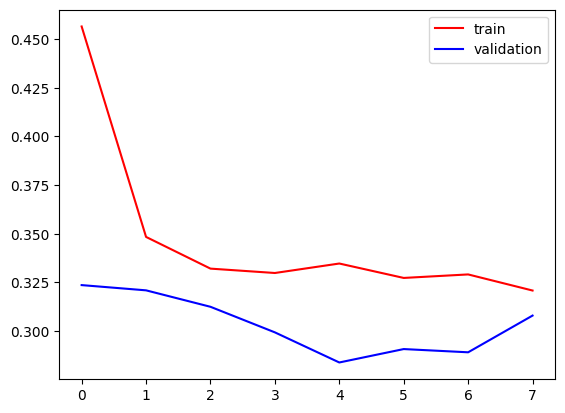

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()